In [76]:
import glob

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [77]:
# Specify here the path
V = "unfrozen"
T = "GCN"
PATH = "../RNN2LY/checkpoints/"+ V +"/*.txt"

In [78]:
files = list(glob.glob(PATH))
files.sort(key=lambda x: ("precision" in x, len(x), x))

In [79]:
files

['../RNN2LY/checkpoints/unfrozen\\TESTINGlosses98.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses0.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses1.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses2.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses3.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses4.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses5.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses6.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses7.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses8.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses9.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses10.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses11.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses12.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses13.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses14.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAININGlosses15.txt',
 '../RNN2LY/checkpoints/unfrozen\\TRAINING

In [80]:
def plot_losses(training, development, testing, ax, p="class", v="1", t="RNN"):    
    ax.plot(training['epoch'],training[p])
    ax.plot(development['epoch'],development[p])
    #ax.plot(testing['epoch'],testing[p])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    
    ax.set_title(p.replace("_", " ") + ' loss evolution')
    #plt.savefig("/home/carlos/Pictures/" + t + v + p + ".png")

In [81]:
training = {"epoch":[],"loss de clase":[], "loss de posición":[], "loss de tamaño":[], "bbox_xy_MSE":[]}
development = {"epoch":[],"loss de clase":[], "loss de posición":[], "loss de tamaño":[], "bbox_xy_MSE":[]}
testing = {"epoch":[],"loss de clase":[], "loss de posición":[], "loss de tamaño":[], "bbox_xy_MSE":[]}

In [82]:

for file in files:
    if file == 'notes.txt':
        print("encontrado")
        continue
    with open(file, "r") as f:
        lines = f.readline()
        losses = lines.split(" ")
        
        if 'DEVELOPMENT' in file:
            add = development
        elif 'TRAINING' in file:
            add = training
        elif 'TESTING' in file:
            add = testing
        else:
            print("unregnized type of loss: ", file)
            continue
        characters = list(file.replace(".txt",""))
        epoch=[]
        for i in range(1,len(characters)+1):
            if characters[-i].isdigit():
                epoch.append(characters[-i])
            else:
                break
        a = ""
        epoch = int(a.join(epoch[::-1]))
        add['epoch'].append(epoch)
        add['loss de clase'].append(float(losses[0]))
        add['loss de posición'].append(float(losses[1]))
        add['loss de tamaño'].append(float(losses[2]))
        add['bbox_xy_MSE'].append(float(losses[3]))
        

[]

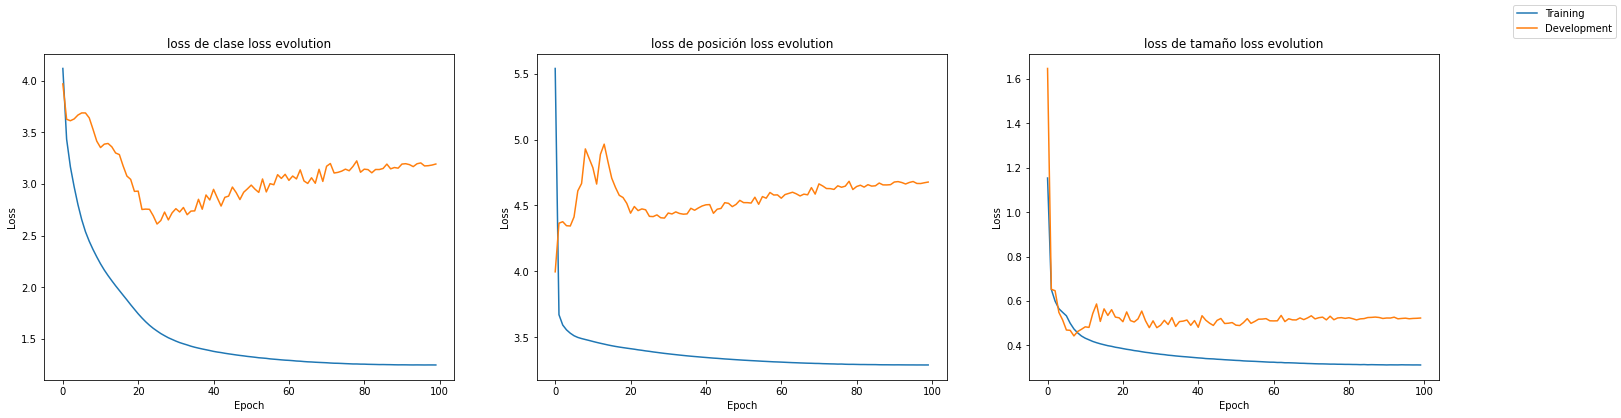

In [83]:

figure, axis = plt.subplots(1, 3, figsize=(25,6))
plot_losses(training, development, testing, axis[0], p="loss de clase", v=V, t=T)
plot_losses(training, development, testing, axis[1],p="loss de posición", v=V, t=T)
plot_losses(training, development, testing,axis[2], p="loss de tamaño", v=V, t=T)
#plot_losses(training, development, testing,axis[1,1], p="bbox_xy_MSE", v=V, t=T)

figure.legend(['Training', 'Development'])
figure.savefig(PATH[:-6])
plt.plot()